In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model import Net
from preprocessing import Create_Matrix, StandardScaler, Split
from sklearn import metrics
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
timesteps = 90
end = 60

In [3]:
df = pd.read_csv('bdi.csv')
df.fillna(method='ffill', inplace=True)
data = df['bdi'].values

In [4]:
x, y = Create_Matrix(data, timesteps)
x_train, y_train, x_val, y_val, x_test, y_test = Split(x, y)

In [5]:
scaler = StandardScaler(y_train)
x_test = scaler.transform(x_test)
x_test = torch.FloatTensor(x_test).to(device)

In [6]:
model = Net().to(device)
model = torch.load('checkpoint.pt')

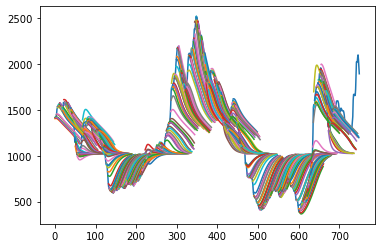

In [7]:
table = []
plt.plot(y_test)
for i in range(750-end):
    start = i
    tmp = x_test[start].reshape(-1, 1)
    ls = []
    model.eval()
    for _ in range(end):
        with torch.no_grad():
            pred = model(tmp.view(1, timesteps, 1))
            ls.append(pred.cpu().numpy())
            tmp = torch.cat((tmp, pred))
            tmp = tmp[-timesteps:]
    pred = scaler.inverse_transform(np.array(ls).reshape(-1))
    plt.plot(range(start, start+end), pred)
    table.append(metrics.mean_absolute_error(pred, y_test[start:start+end]))
plt.show()

In [8]:
for i in table:
    print(i)
print(np.mean(table))

172.87771809895833
165.50362548828124
173.46135457356772
172.9266092936198
157.11199137369792
155.8461486816406
123.2472920735677
129.7986612955729
122.55710856119792
129.82103881835937
128.3638712565104
122.516259765625
121.68280843098958
121.63328450520834
125.59599202473959
127.43806355794271
124.8153788248698
126.35182291666666
129.07998453776042
143.94903971354168
140.04394938151043
129.6452840169271
119.70276692708333
122.98199666341146
120.28779907226563
123.04550577799479
126.52637532552083
134.34485880533853
130.6751953125
133.57805786132812
136.8168497721354
140.63450927734374
145.5945027669271
146.82645060221355
140.31629028320313
143.65089314778646
142.72846272786458
144.0285217285156
147.71780192057292
152.01154581705728
150.85079956054688
150.3759501139323
153.39153849283855
156.54126586914063
156.04418538411457
157.4307861328125
172.0507609049479
184.45492350260417
210.45257771809895
211.32250366210937
221.95750122070314
216.3027364095052
219.04010009765625
221.475396728